In [282]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# signal processing
from scipy import signal
import math

In [283]:
os.chdir('/Users/kumarmohit/Documents/ubicomp/bonus exe1/Ubicomp2020-BE1-data')

In [284]:
X = pd.read_csv('data-accel_x.csv')
Y = pd.read_csv('data-accel_y.csv')
Z = pd.read_csv('data-accel_z.csv')
ecg= pd.read_csv('data-ecg.csv')
ppg=pd.read_csv('data-ppg.csv')
barometer=pd.read_csv('data-barometer.csv')
temperature=pd.read_csv('data-temperature.csv')
#Y = pd.read_csv('test_emg.csv').drop('Id',axis=1)
#X_train_eeg1 = pd.read_csv('train_eeg1.csv').drop('Id', axis=1) #read csv then drop id column
#X_train_eeg2 = pd.read_csv('train_eeg2.csv').drop('Id', axis=1) #read csv then drop id column

In [285]:
rows_bar=barometer.shape[0]
rows_tmp=tmp.shape[0]
rows=ecg.shape[0]
fs=128 # Sampling frequency = 128Hz, i.e 128 samples in 1 second
Total_time=round(ecg.shape[0]/fs)
ts15 = 15*fs # samples in 15 second
ts60 = 60*fs # samples in 60 seconds
num_res1 = round(rows/ts15)
num_res3 = round(rows/ts60)

In [286]:
num_res3

8

In [287]:
ecg.shape

(61439, 1)

In [288]:
# create a plot for the comparison purpose
def plot_ecg_ppg(time_step):# in second, range from 1 to 32
    cnt=time_step-1
    step=np.arange(0,ecg.shape[0],ts15)
    r=np.arange(0,rows)
    if cnt==31:
        data_range=r[step[cnt]:]
        x=np.arange(data_range[0],data_range[0]+len(data_range)+2,fs)
        tmp=int(data_range[0]/fs)
        xlabel=np.arange(tmp,tmp+16)
    else:
        data_range=r[step[cnt]:step[cnt+1]]
        x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
        tmp=int(data_range[0]/fs)
        xlabel=np.arange(tmp,tmp+16)


    plt.style.use('fivethirtyeight')
    #fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
    ax1.set_title('Plots')
    ax2.set_xlabel('Time(sec)')
    ax1.set_ylabel('ecg')
    ax2.set_ylabel('ppg')
    #ax3.set_ylabel('barometer')
    #ax4.set_ylabel('temperature')
    # ax4.set_xticks(x)
    # ax4.set_xticklabels(xlabel)
    # ax3.set_xticks(x)
    # ax3.set_xticklabels(xlabel)
    ax2.set_xticks(x)
    ax2.set_xticklabels(xlabel)
    ax1.set_xticks(x)
    ax1.set_xticklabels(xlabel)
    #ax1.set_xlim(0,15*fs)
    ax1.plot(data_range,ecg.iloc[data_range],color='b')
    ax2.plot(data_range,ppg.iloc[data_range],color='g')
    # ax3.plot(data_range,barometer.iloc[data_range],color='r')
    # ax4.plot(data_range,tmp.iloc[data_range],color='m')


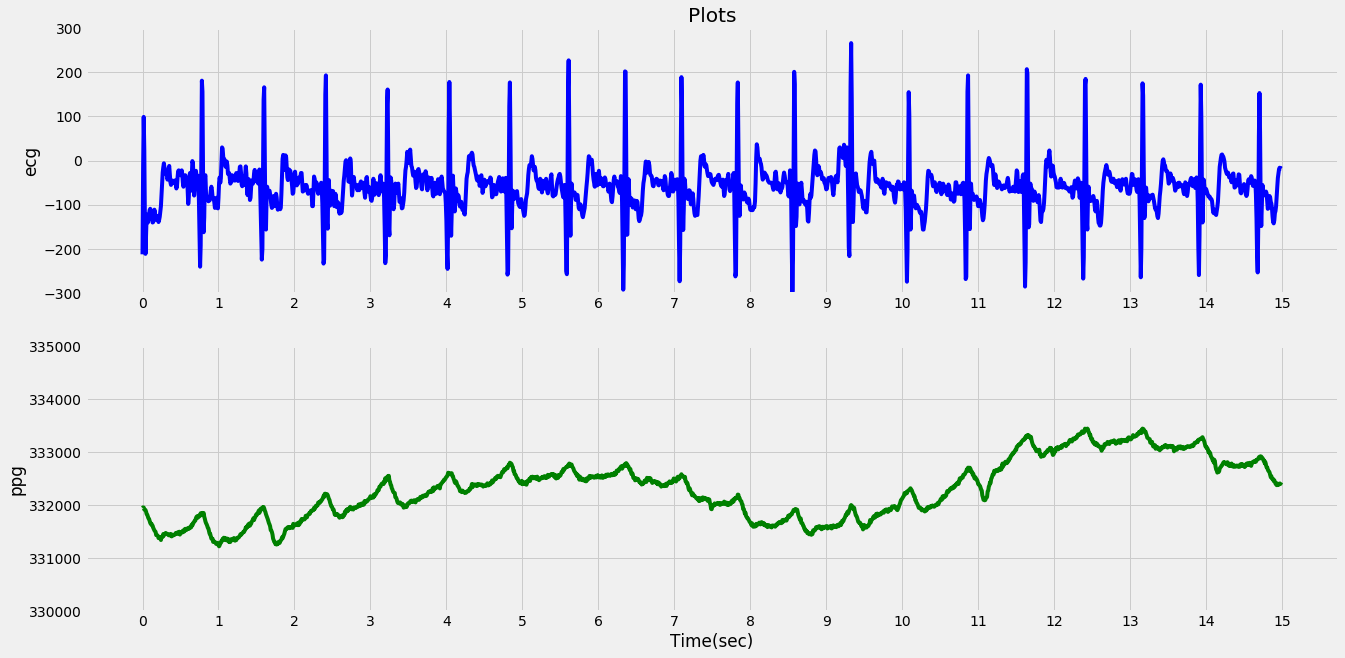

In [289]:
# create a plot for the comparison purpose
#def plot_eeg_ppg(time_step):# in second, range from 1 to 32
# cnt=time_step-1
# step=np.arange(0,ecg.shape[0],fs*3)
# r=np.arange(0,rows)
# if cnt==31:
#     data_range=r[step[cnt]:]
# else:
#     data_range=r[step[cnt]:step[cnt+1]]

start_time=0
end_time=15
data_range = np.arange(start_time*fs,end_time*fs)
x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
xlabel=np.arange(start_time,end_time+1)


plt.style.use('fivethirtyeight')
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('ecg')
ax2.set_ylabel('ppg')
#ax3.set_ylabel('barometer')
#ax4.set_ylabel('temperature')
# ax4.set_xticks(x)
# ax4.set_xticklabels(xlabel)
# ax3.set_xticks(x)
# ax3.set_xticklabels(xlabel)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabel)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabel)
ax1.set_ylim(-300,300)
ax2.set_ylim(330000,335000)

ax1.plot(data_range,ecg.iloc[data_range],color='b')
ax2.plot(data_range,ppg.iloc[data_range],color='g')
# ax3.plot(data_range,barometer.iloc[data_range],color='r')
# ax4.plot(data_range,tmp.iloc[data_range],color='m')


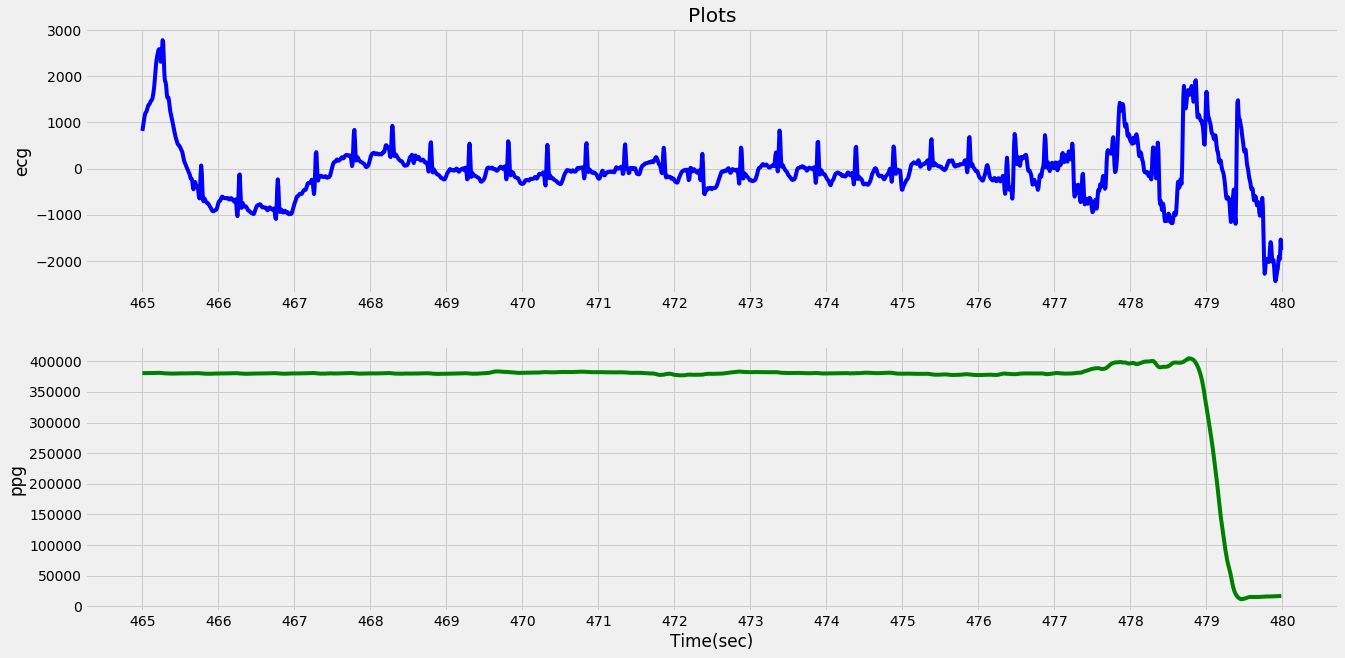

In [290]:
plot_ecg_ppg(32)

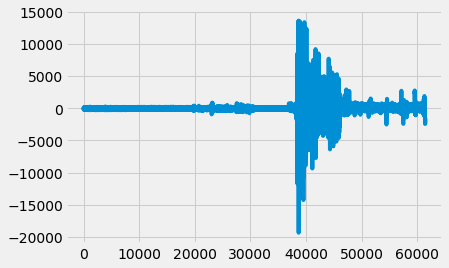

In [291]:
plt.plot(ecg)

# Preprocessing

In [292]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [293]:
y=butter_bandpass_filter(ecg,0.5,40,fs,4)

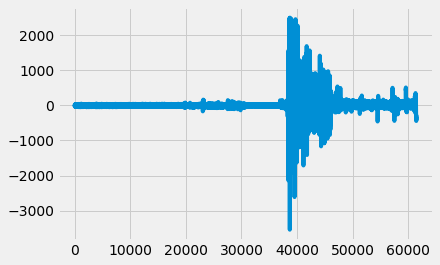

In [294]:
plt.plot(y)

# Calculation HR

In [295]:
# Calculate the peak to peak value for each time_step
import statistics
def peak(sig):
    final=[]
    sd_peaks=[]
    step=np.arange(0,len(sig),ts15)
    #print(step)
    r=np.arange(0,len(sig))
    #print(r)
    for cnt in range(32):
        rr_peaks=[] 
        if cnt==31:
            data_range=r[step[cnt]:]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
        else:
            data_range=r[step[cnt]:step[cnt+1]]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
            
        tmp_sig=sig[data_range]
        threshold=np.arange(10,1500,10)
        for thres in threshold:
            count=0
            rr_peaks=[]
            for i in range(0,len(tmp_sig)):
                if tmp_sig[i]>=thres:
                    #count=count+1
                    var=data_range[0]+i
                    if(len(rr_peaks)==0):
                        count=count+1
                        rr_peaks.append(var/fs) 
                    elif((var/fs- rr_peaks[-1])>=0.5 ):
                        count=count+1
                        rr_peaks.append(var/fs)
            if(count<=27 and count>=15):
                #print("step " + str(cnt) + " : " )
                #print(thres)
                break
        
        #print("step " + str(cnt) + " : " )
        #print (rr_peaks)  
        #print(len(rr_peaks))
        rr_peaks=np.diff(rr_peaks)
        sd_peaks.append(rr_peaks.tolist())
        #print (rr_peaks)  
        #print(len(rr_peaks))
        final.append(np.median(rr_peaks))
        
    return final,sd_peaks

In [296]:
x,sdecgp=peak(y)

In [297]:
x

[0.765625,
 0.7578125,
 0.75390625,
 0.78125,
 0.6953125,
 0.6875,
 0.6875,
 0.671875,
 0.65234375,
 0.65625,
 0.625,
 0.63671875,
 0.578125,
 0.5234375,
 0.53515625,
 0.5625,
 0.578125,
 0.71875,
 0.734375,
 0.6328125,
 0.5,
 0.5078125,
 0.515625,
 0.5234375,
 0.6328125,
 0.578125,
 0.63671875,
 0.5,
 0.5078125,
 0.5,
 0.5078125,
 0.5078125]

In [298]:
hr_ecg=[60/i for i in x]


In [299]:
hr_ecg

[78.36734693877551,
 79.17525773195877,
 79.58549222797927,
 76.8,
 86.29213483146067,
 87.27272727272727,
 87.27272727272727,
 89.30232558139535,
 91.97604790419162,
 91.42857142857143,
 96.0,
 94.23312883435582,
 103.78378378378379,
 114.6268656716418,
 112.11678832116789,
 106.66666666666667,
 103.78378378378379,
 83.47826086956522,
 81.70212765957447,
 94.81481481481481,
 120.0,
 118.15384615384616,
 116.36363636363636,
 114.6268656716418,
 94.81481481481481,
 103.78378378378379,
 94.23312883435582,
 120.0,
 118.15384615384616,
 120.0,
 118.15384615384616,
 118.15384615384616]

# Calculation of SDNN using ecg 

In [300]:
sd1=[]
for incr in range(0,32):
    if incr>28:
        sd1.append(-1)
    else:
        tmp=sdecgp[incr:incr+4]
        tmp=[j for sub in tmp for j in sub]
        val=statistics.stdev(tmp)
        sd1.append(val*1000)

In [301]:
sd1

[22.598048690475846,
 33.58386737541188,
 39.27658355160436,
 40.75532418156652,
 26.19296047038405,
 42.68020637410241,
 78.82401306777139,
 103.26706467452848,
 113.93532962623831,
 130.92103638015524,
 128.67841900857164,
 126.70555057663216,
 133.44327342623023,
 116.70611636392567,
 116.00125849281538,
 106.13435943804741,
 185.50193593221604,
 228.90505181243415,
 258.8246923721177,
 293.98221890794593,
 239.05676531617308,
 274.5954126631035,
 266.6158548376527,
 243.77986180781548,
 251.97603885548992,
 178.79700622742615,
 184.70870600089134,
 183.74038288580786,
 208.79365384165564,
 -1,
 -1,
 -1]

# Calculation HR using ppg

In [302]:
y=butter_bandpass_filter(ppg,0.5,5,fs)

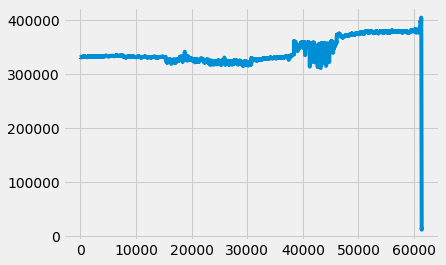

In [303]:
plt.plot(ppg)

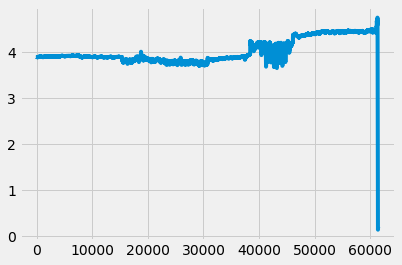

In [304]:
plt.plot(y)

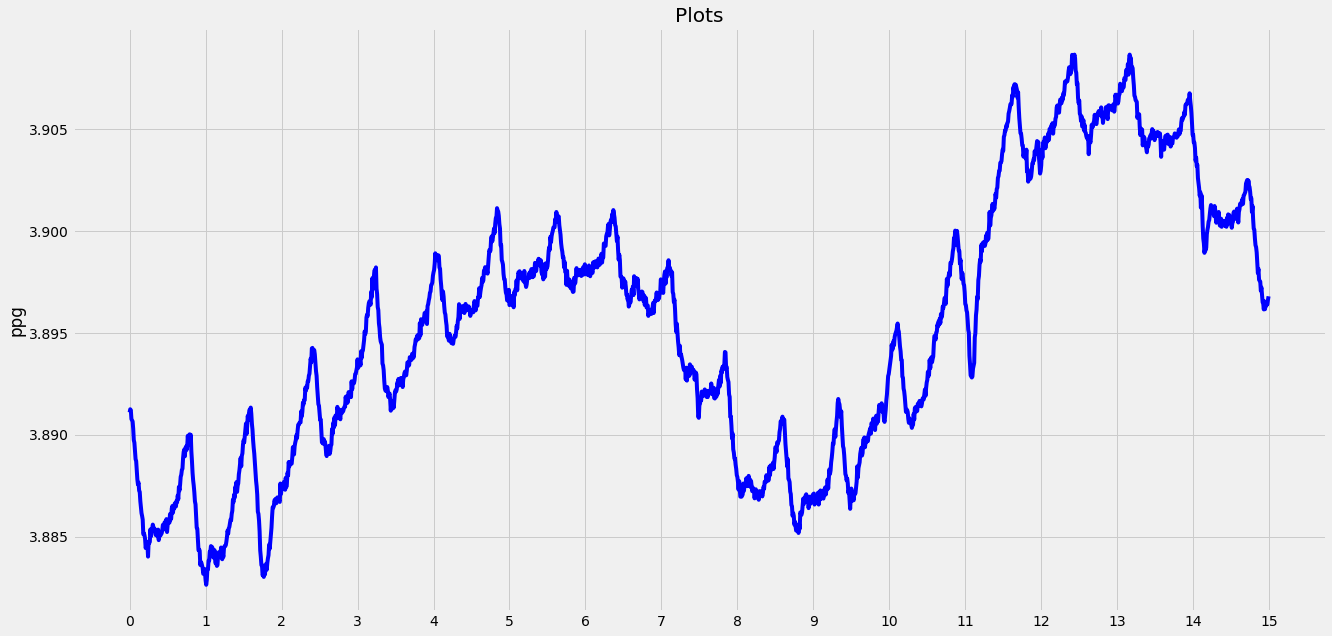

In [305]:
# create a plot for the comparison purpose
#def plot_eeg_ppg(time_step):# in second, range from 1 to 32
# cnt=time_step-1
# step=np.arange(0,ecg.shape[0],fs*3)
# r=np.arange(0,rows)
# if cnt==31:
#     data_range=r[step[cnt]:]
# else:
#     data_range=r[step[cnt]:step[cnt+1]]

start_time=0
end_time=15
data_range = np.arange(start_time*fs,end_time*fs)
x=np.arange(data_range[0],data_range[0]+len(data_range)+1,fs)
xlabel=np.arange(start_time,end_time+1)


plt.style.use('fivethirtyeight')
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
#ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('ppg')
#ax2.set_ylabel('ppg')
#ax3.set_ylabel('barometer')
#ax4.set_ylabel('temperature')
# ax4.set_xticks(x)
# ax4.set_xticklabels(xlabel)
# ax3.set_xticks(x)
# ax3.set_xticklabels(xlabel)
#ax2.set_xticks(x)
#ax2.set_xticklabels(xlabel)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabel)
#ax1.set_ylim(-300,300)
#ax2.set_ylim(330000,335000)

ax1.plot(data_range,y[data_range],color='b')
#ax1.plot(data_range,ppg.iloc[data_range],color='g')
# ax3.plot(data_range,barometer.iloc[data_range],color='r')
# ax4.plot(data_range,tmp.iloc[data_range],color='m')


In [306]:
# Calculate the peak to peak value for each time_step

def peakppg(sig):
    final=[]
    sd=[]
    step=np.arange(0,len(sig),ts15)
    #print(step)
    r=np.arange(0,len(sig))
    #print(r)
    for cnt in range(32):
        rr_peaks=[] 
        if cnt==31:
            data_range=r[step[cnt]:]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
        else:
            data_range=r[step[cnt]:step[cnt+1]]
            x=np.arange(data_range[0],data_range[0]+len(data_range),fs)
            tmp=int(data_range[0]/fs)
            xlabel=np.arange(tmp,tmp+16)
            
        tmp_sig=sig[data_range]
        tmp_sig = tmp_sig.ravel()
        peaks2, _ = signal.find_peaks(tmp_sig,distance=64,height=0.005)
        rr_peaks=np.diff(peaks2)
        #print("step " + str(cnt) + " : " )
        #print (rr_peaks)  
        #print(len(rr_peaks))
        sd.append(rr_peaks.tolist())
        final.append(np.median(rr_peaks))
        
    return final,sd

In [307]:
z,sdppgp=peakppg(y)
len(z)

32

In [308]:
z=[i/fs for i in z]

In [309]:
hr_ppg=[60/i for i in z]
hr_ppg

[76.8,
 80.0,
 79.58549222797927,
 77.57575757575758,
 85.33333333333333,
 86.29213483146067,
 87.27272727272727,
 88.27586206896552,
 91.42857142857143,
 93.65853658536585,
 96.60377358490567,
 91.42857142857143,
 99.74025974025975,
 109.71428571428571,
 88.27586206896552,
 93.65853658536585,
 96.0,
 82.58064516129032,
 81.70212765957447,
 88.27586206896552,
 94.81481481481481,
 97.21518987341773,
 101.72185430463576,
 98.46153846153847,
 88.27586206896552,
 111.30434782608695,
 105.20547945205479,
 109.71428571428571,
 117.25190839694656,
 118.15384615384616,
 118.15384615384616,
 117.25190839694656]

# Calculation of SDNN using ppg 

In [310]:
sd2=[]
for incr in range(0,32):
    if incr>28:
        sd2.append(-1)
    else:
        tmp=sdppgp[incr:incr+4]
        tmp=[j/fs for sub in tmp for j in sub]
        val=statistics.stdev(tmp)
        sd2.append(val*1000)

In [311]:
sd2

[32.93539625525922,
 48.00436307249437,
 69.8746979657058,
 69.43577658049365,
 66.58293060737996,
 120.7449759556083,
 131.32194715487378,
 148.80785277452117,
 154.01483620377974,
 125.06367831383658,
 120.41427725394674,
 134.51038208981007,
 150.8302961785531,
 152.984543144003,
 142.4057611995706,
 117.22907175795214,
 102.8746244390053,
 108.51744835207238,
 132.03347072909054,
 171.57796980085217,
 183.54343375262565,
 182.24741794488088,
 184.61672128667615,
 168.5483574513636,
 166.62800658390233,
 164.48672339998583,
 172.88386113496912,
 149.82839909779014,
 145.74655793403497,
 -1,
 -1,
 -1]

# Finding activity level for task3 

In [312]:
altitude=[]
for i in barometer.to_numpy():
#     print(i)
    al=44330 * (1-pow((float(i)/1013.25),0.1903))
    altitude.append(al)
len(altitude)

5999

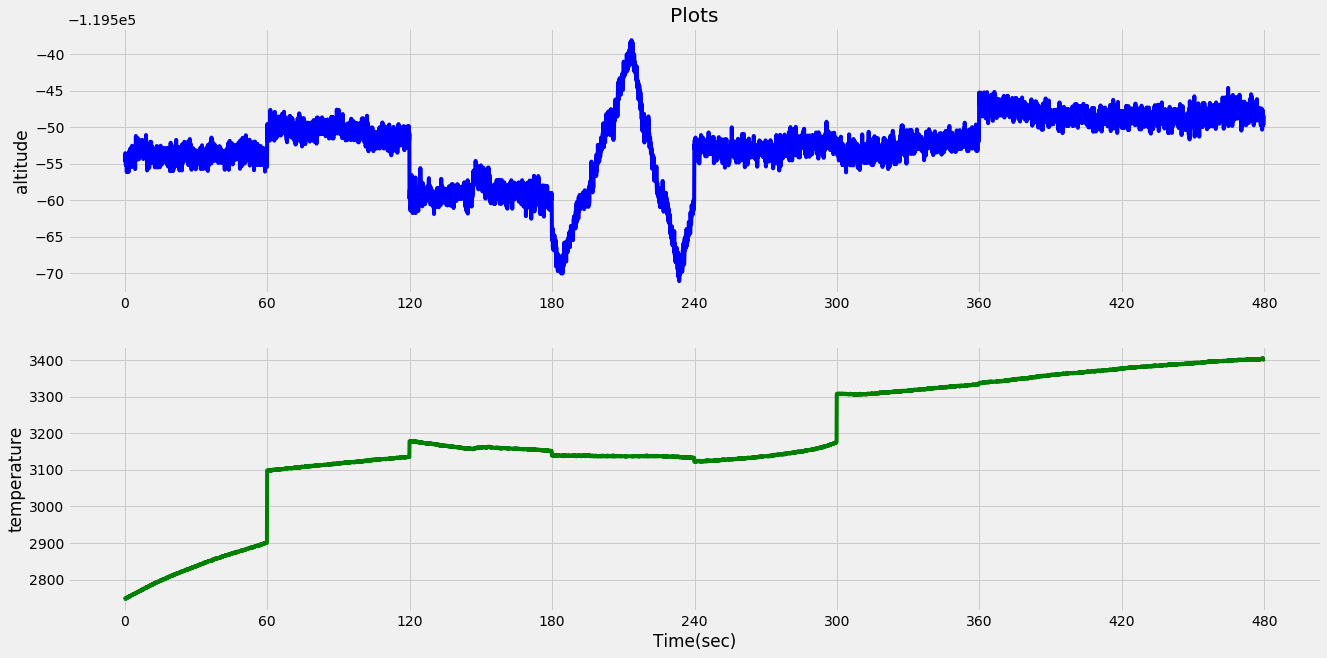

In [313]:
# create a plot for the comparison purpose
#def plot_eeg_ppg(time_step):# in second, range from 1 to 32
# cnt=time_step-1
# step=np.arange(0,ecg.shape[0],fs*3)
# r=np.arange(0,rows)
# if cnt==31:
#     data_range=r[step[cnt]:]
# else:
#     data_range=r[step[cnt]:step[cnt+1]]

# start_time=0
# end_time=15
# data_range = np.arange(start_time*fs,end_time*fs)
x=np.arange(0,6001,750)
xlabel=np.arange(0,481,60)


plt.style.use('fivethirtyeight')
#fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=[25,30])
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[20,10])
ax1.set_title('Plots')
ax2.set_xlabel('Time(sec)')
ax1.set_ylabel('altitude')
ax2.set_ylabel('temperature')
#ax3.set_ylabel('barometer')
#ax4.set_ylabel('temperature')
# ax4.set_xticks(x)
# ax4.set_xticklabels(xlabel)
# ax3.set_xticks(x)
# ax3.set_xticklabels(xlabel)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabel)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabel)
# ax1.set_ylim(-300,300)
# ax2.set_ylim(330000,335000)

ax1.plot(altitude,color='b')
ax2.plot(temperature,color='g')
# ax3.plot(data_range,barometer.iloc[data_range],color='r')
# ax4.plot(data_range,tmp.iloc[data_range],color='m')


In [314]:
grad=[]
for inc in range(0,6000,750):
    sig=temperature[inc:inc+750]
    val=np.mean(np.gradient(np.array(sig).ravel().tolist()))
    if(val<0):
        grad.append(-0.4)
    else:
        grad.append(val)

In [315]:
g=[i*8 for i in grad]

In [316]:
g=np.ceil(g)

In [317]:
grad

[0.6026666666666667,
 0.13533333333333333,
 -0.4,
 -0.4,
 0.33266666666666667,
 0.04066666666666666,
 0.054,
 0.035380507343124167]

In [318]:
intervals  = 8
low_hr = 68
high_hr = 130
activity=[]
for i in range(intervals):
    lo = i*4
    hi = lo + 4
    result = hr_ecg[lo:hi]
    #print(result)
    hr = np.median(result)
    activity_level = min(((hr-low_hr)/(high_hr-low_hr))*10 +g[i] ,10)
    activity.append(math.floor(activity_level))

In [319]:
activity

[6, 5, 1, 3, 6, 8, 6, 9]

In [280]:
import pandas as pd
res1=pd.DataFrame({
    0:range(0,480,15),
    1:hr_ecg,
    2:sd1
})

In [320]:
res2=pd.DataFrame({
    0:range(0,480,15),
    1:hr_ppg,
    2:sd2
})

In [326]:
res3=pd.DataFrame({
    0:range(0,480,60),
    1:activity,
})

In [324]:
res1.to_csv('result1.csv',index=False,header=False)

In [329]:
res2.to_csv('result2.csv',index=False,header=False)

In [330]:
res3.to_csv('result3.csv',index=False,header=False)